In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

In [2]:
# import the personal_info data
bachelors = pd.read_csv('./pre_processing/bachelors.csv')
display(bachelors.head())

conts = pd.read_csv('./pre_processing/contestants_processed.csv')
conts = conts.dropna()
display(conts.head())

,season,name,age,hometown,region,job_title,job_title_to_category
0,1,Alex Michel,31,"Charlottesville, Virginia",South,Management consultant,Business/Consulting
1,2,Aaron Buerge,28,"Butler, Missouri",Midwest,Banker,Finance
2,3,Andrew Firestone,27,"Santa Barbara, California",West,Sales manager of Firestone Family estates,Real Estate
3,4,Bob Guiney,32,"Riverview, Michigan",Midwest,Creator of a mortgage company,Finance
4,5,Jesse Palmer,25,"Toronto, Ontario",Foreign,College football player,Sports


,season,name,age,hometown,job,outcome
0,1,Amanda Marsh,23.0,"Chanute, Kansas",Event Planner,winner
1,1,Trista Rehn,29.0,"St. Louis, Missouri",Miami Heat Dancer,runnerUp
2,1,Shannon Oliver,24.0,"Dallas, Texas",Financial Management Consultant,5
3,1,Kimberly Karels,24.0,"Tempe, Arizona",Nanny,4
4,1,Cathy Grimes,22.0,"Terre Haute, Indiana",Graduate Student,3


In [3]:
# import the instagram_data
bachelors_ext = pd.read_csv('./pre_processing/instagram_data/bachelors.csv')
bachelors_ext = bachelors_ext.fillna(0)
display(bachelors_ext.head())

winners_ext = pd.read_csv('./pre_processing/instagram_data/winners.csv')
winners_ext = winners_ext.fillna(0)
display(winners_ext.head())

,name,season,hair_color,eye_color,instagram_followers,twitter_followers,ethnicity
0,Alex Michel,1,brown,hazel,0.0,0.0,white
1,Aaron Buerge,2,brown,hazel,424.0,0.0,white
2,Andrew Firestone,3,brown,brown,12100.0,189.0,white
3,Bob Guiney,4,brown,brown,145000.0,28200.0,white
4,Jesse Palmer,5,black,blue,272000.0,43700.0,white


,name,season,hair_color,eye_color,instagram_followers,twitter_followers,ethnicity,winner
0,Amanda Marsh,1,blonde,green,1757.0,0.0,white,yes
1,Trista Rehn,1,brown,brown,396000.0,118400.0,white,no
2,Helene Eksterowicz,2,brown,brown,0.0,14.0,white,yes
3,Brooke Smith,2,blonde,blue,4335.0,2525.0,white,no
4,Jennifer Schefft,3,blonde,hazel,3646.0,5751.0,white,yes


In [4]:
# make combined dataframe of bachelors and contestants personal info
bach_simp = bachelors[['season','name', 'age']]
bach_simp['type'] = 'Bachelor'

conts_simp = conts[['season','name', 'age']]
conts_simp['type'] = 'Contestant'

combined_simp = pd.concat([bach_simp, conts_simp])
display(combined_simp)

/tmp/ipykernel_62211/4256404994.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bach_simp['type'] = 'Bachelor'
/tmp/ipykernel_62211/4256404994.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conts_simp['type'] = 'Contestant'


,season,name,age,type
0,1,Alex Michel,31.0,Bachelor
1,2,Aaron Buerge,28.0,Bachelor
2,3,Andrew Firestone,27.0,Bachelor
3,4,Bob Guiney,32.0,Bachelor
4,5,Jesse Palmer,25.0,Bachelor
...,...,...,...,...
581,28,Samantha Hale,31.0,Contestant
582,28,Samantha Washington,25.0,Contestant
583,28,Sandra Rabadi,26.0,Contestant
584,28,Talyah Jackson,23.0,Contestant


In [5]:
# Display Summary Statistics
print('Overall Age Summary Statistics')
combined_simp.groupby('type')['age'].describe()

Overall Age Summary Statistics


,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
Bachelor,28.0,30.642857,3.743778,25.0,28.0,29.5,33.0,40.0
Contestant,585.0,26.234188,2.680126,21.0,24.0,26.0,28.0,36.0


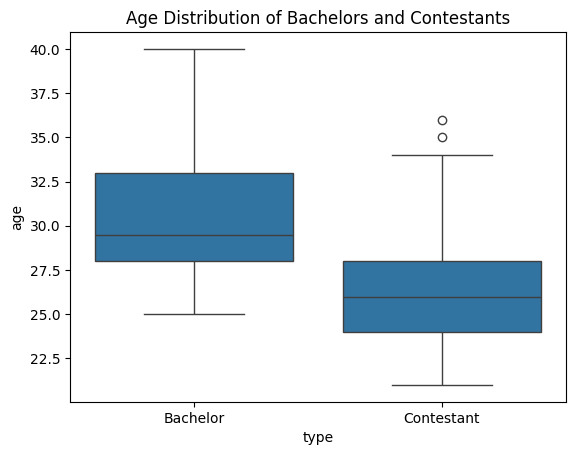

In [6]:
# boxplots of contestants and bachelors
boxplot = sns.boxplot(x='type', y='age', data=combined_simp).set_title('Age Distribution of Bachelors and Contestants')

In [7]:
# Analyze Winners Ages

winners = conts[conts['outcome'] == 'winner']
print('Winner Age Summary Statistics')
winners['age'].describe()

Winner Age Summary Statistics


count    20.00000
mean     25.20000
std       2.19089
min      22.00000
25%      23.00000
50%      25.00000
75%      27.00000
max      29.00000
Name: age, dtype: float64

In [8]:
# Analyze Runner-Up Ages

runnerUps = conts[conts['outcome'] == 'runnerUp']
print('Runner-Up Age Summary Statistics')
runnerUps['age'].describe()

Runner-Up Age Summary Statistics


count    18.000000
mean     25.666667
std       2.497057
min      22.000000
25%      24.250000
50%      25.000000
75%      26.500000
max      32.000000
Name: age, dtype: float64

In [9]:
# Analyze Last Place Ages

lastPlace = conts[conts['outcome'] == '1']
print('Last Place Age Summary Statistics')
lastPlace['age'].describe()

Last Place Age Summary Statistics


count    187.000000
mean      26.454545
std        2.924097
min       21.000000
25%       24.000000
50%       26.000000
75%       28.000000
max       36.000000
Name: age, dtype: float64

In [10]:
# Analyze Bachelors Ages

print('Bachelors Age Summary Statistics')
bachelors['age'].describe()

Bachelors Age Summary Statistics


count    28.000000
mean     30.642857
std       3.743778
min      25.000000
25%      28.000000
50%      29.500000
75%      33.000000
max      40.000000
Name: age, dtype: float64

Bachelors Age and Season Correlation & P-Value
PearsonRResult(statistic=-0.15153372957622815, pvalue=0.4414514130035082)


Text(0.5, 1.0, 'Bachelor Age vs Season')

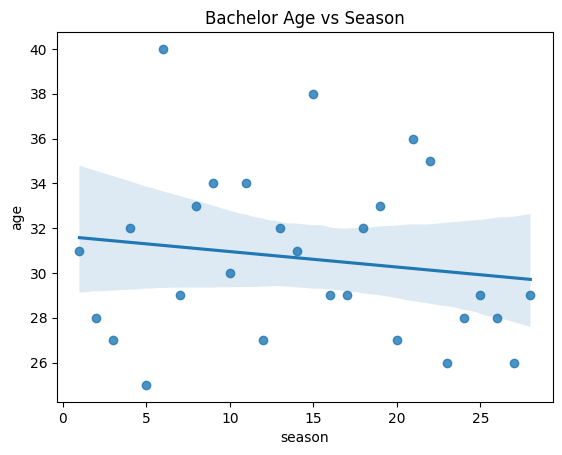

In [11]:
# Plot Bachelors Ages over seasons
print("Bachelors Age and Season Correlation & P-Value")
print(sp.stats.pearsonr(bachelors['age'], bachelors['season']))

sns.regplot(data=bachelors, x='season', y='age').set_title('Bachelor Age vs Season')

Winners Age and Season Correlation & P-Value
PearsonRResult(statistic=0.3168098152489904, pvalue=0.17352839230910305)


Text(0.5, 1.0, 'Winners Age vs Season')

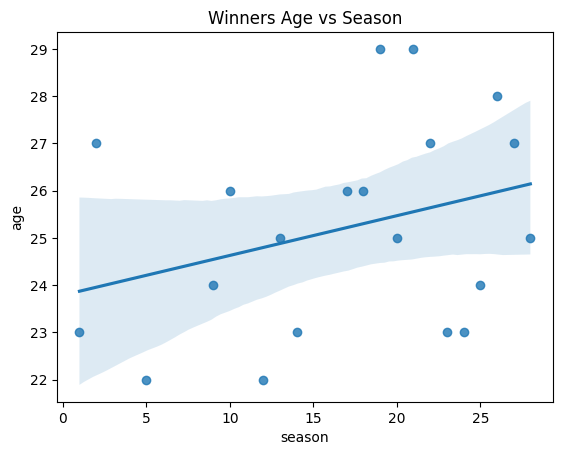

In [12]:
# Plot Winners Ages over seasons
print("Winners Age and Season Correlation & P-Value")
print(sp.stats.pearsonr(winners['age'], winners['season']))
sns.regplot(data=winners, x='season', y='age').set_title('Winners Age vs Season')

All Contestants Age and Season Correlation & P-Value
PearsonRResult(statistic=0.002761516912761384, pvalue=0.9468607765542665)


Text(0.5, 1.0, 'All Contestants Age vs Season')

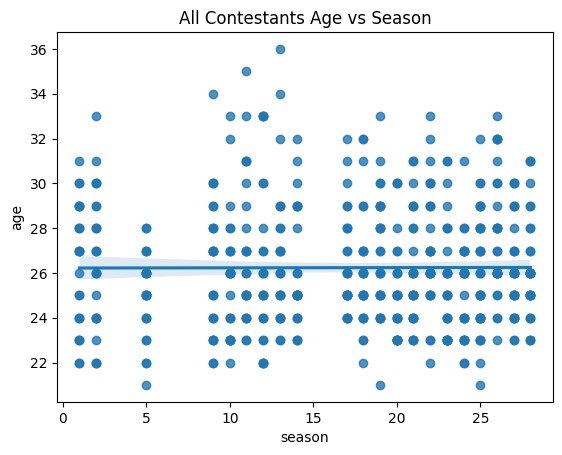

In [13]:
# Plot All Contestants over seasons
print("All Contestants Age and Season Correlation & P-Value")
print(sp.stats.pearsonr(conts['age'], conts['season']))
sns.regplot(data=conts, x='season', y='age').set_title('All Contestants Age vs Season')

Text(0.5, 1.0, 'Runners-Up Ethnicities')

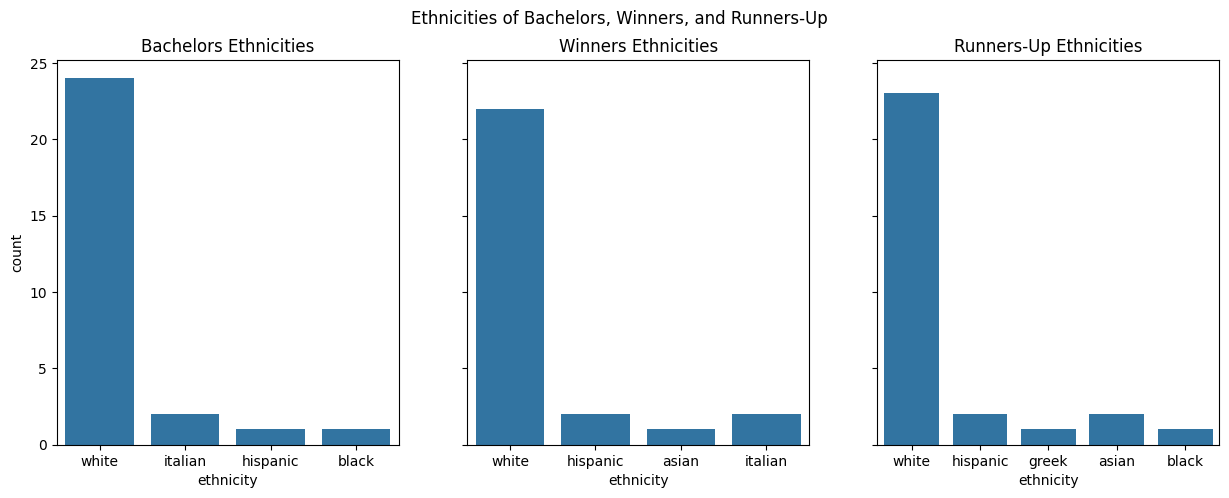

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Ethnicities of Bachelors, Winners, and Runners-Up')

# Tally Ethnicity of Bachelors
bach_ethnicities = bachelors_ext.groupby('ethnicity').size()
sns.countplot(bachelors_ext, ax=axes[0], x='ethnicity')
axes[0].set_title('Bachelors Ethnicities')

# Tally Ethnicity of Winners
winners_ethnicities = winners_ext['ethnicity'].where(winners_ext['winner'] == 'yes')
winners_ethnicities = winners_ethnicities.value_counts()
sns.countplot(winners_ext.where(winners_ext['winner'] == 'yes'), ax=axes[1], x='ethnicity')
axes[1].set_title('Winners Ethnicities')

# Tally Ethnicity of Runners-Up
runnersUp_ethnicities = winners_ext['ethnicity'].where(winners_ext['winner'] == 'no')
runnersUp_ethnicities = runnersUp_ethnicities.value_counts()
sns.countplot(winners_ext.where(winners_ext['winner'] == 'no'), ax=axes[2], x='ethnicity')
axes[2].set_title('Runners-Up Ethnicities')

/tmp/ipykernel_62211/2538964623.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(bachelors_ext, ax=axes[0], x='eye_color', palette=eye_color_palette, saturation=1, edgecolor='black')
/tmp/ipykernel_62211/2538964623.py:8: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.countplot(bachelors_ext, ax=axes[0], x='eye_color', palette=eye_color_palette, saturation=1, edgecolor='black')
/tmp/ipykernel_62211/2538964623.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(winners_ext.where(winners_ext['winner'] == 'yes'), ax=axes[1], x='eye_color', palette=eye_color_palette, saturation=1, edgecolor='black')
/tmp/ipykernel_62211/2538964623.py:

Text(0.5, 1.0, 'Runners-Up Eye Colors')

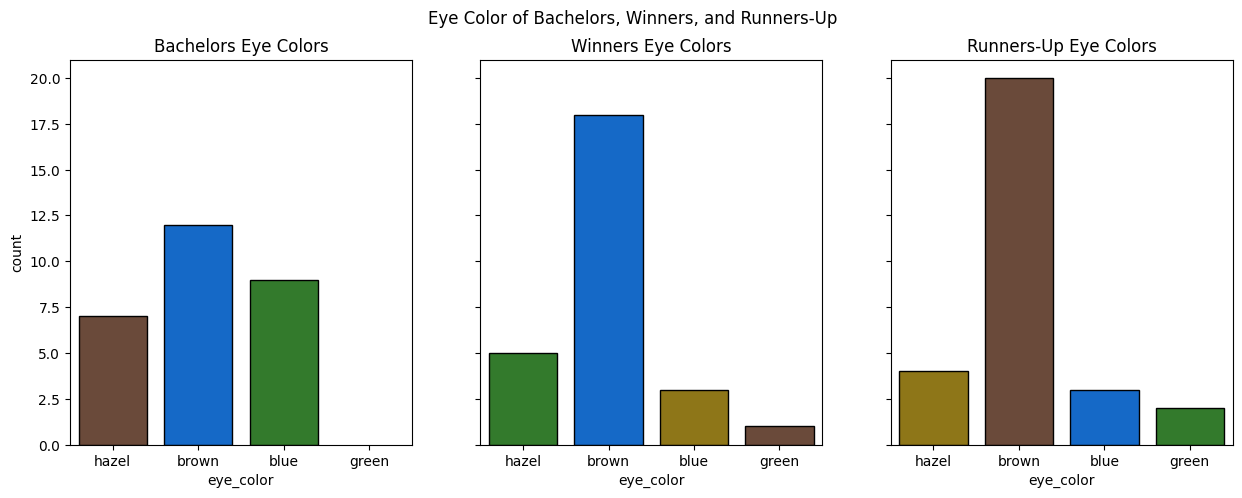

In [15]:
eye_color_palette = ['#6a4a3a','#1569C7','#337a2c', '#8E7618']

fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True, sharex=True)
fig.suptitle('Eye Color of Bachelors, Winners, and Runners-Up')

# Tally Eye Color of Bachelors
bach_eyecolors = bachelors_ext.groupby('eye_color').size()
sns.countplot(bachelors_ext, ax=axes[0], x='eye_color', palette=eye_color_palette, saturation=1, edgecolor='black')
axes[0].set_title('Bachelors Eye Colors')

# Tally Eye Color of Winners
winners_eyecolors = winners_ext['eye_color'].where(winners_ext['winner'] == 'yes')
sns.countplot(winners_ext.where(winners_ext['winner'] == 'yes'), ax=axes[1], x='eye_color', palette=eye_color_palette, saturation=1, edgecolor='black')
axes[1].set_title('Winners Eye Colors')

# Tally Eye Color of Runners-Up
runnersUp_eyecolors = winners_ext['eye_color'].where(winners_ext['winner'] == 'no')
sns.countplot(winners_ext.where(winners_ext['winner'] == 'no'), ax=axes[2], x='eye_color', palette=eye_color_palette, saturation=1, edgecolor='black')
axes[2].set_title('Runners-Up Eye Colors')

/tmp/ipykernel_62211/1717056410.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(bachelors_ext, ax=axes[0], x='hair_color', palette=hair_color_palette, saturation=1, edgecolor='black')
/tmp/ipykernel_62211/1717056410.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(winners_ext.where(winners_ext['winner'] == 'yes'), ax=axes[1], x='hair_color', palette=hair_color_palette, saturation=1, edgecolor='black')
/tmp/ipykernel_62211/1717056410.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(winners_ext.where(winners_ext['winner'] == 

Text(0.5, 1.0, 'Runners-Up Hair Colors')

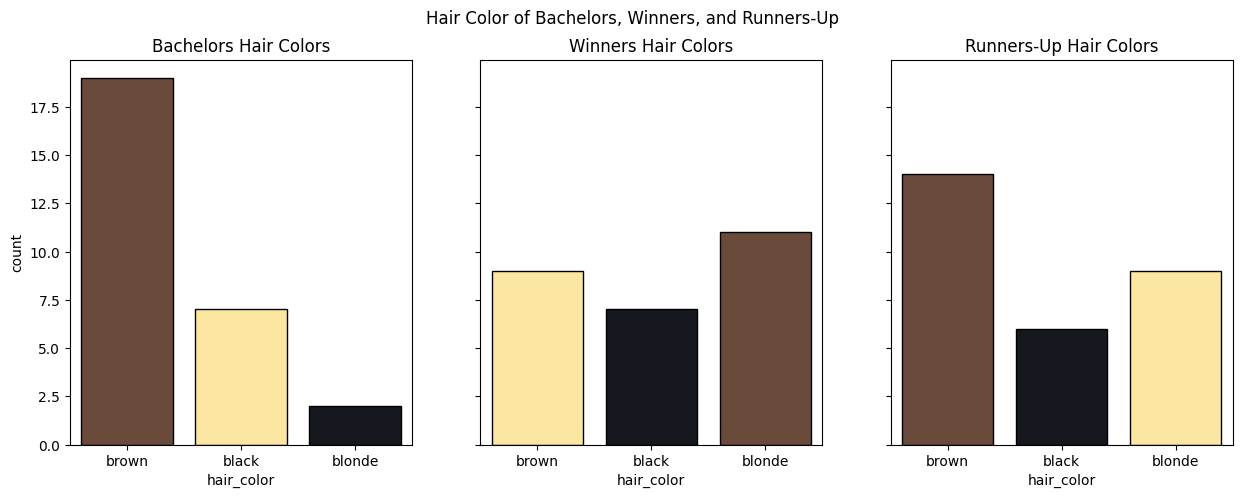

In [16]:
hair_color_palette = ['#6a4a3a','#fbe7a1','#15181F']

fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True, sharex=True)
fig.suptitle('Hair Color of Bachelors, Winners, and Runners-Up')

# Tally Hair Color of Bachelors
bach_haircolors = bachelors_ext.groupby('hair_color').size()
sns.countplot(bachelors_ext, ax=axes[0], x='hair_color', palette=hair_color_palette, saturation=1, edgecolor='black')
axes[0].set_title('Bachelors Hair Colors')

# Tally Hair Color of Winners
winners_haircolors = winners_ext['hair_color'].where(winners_ext['winner'] == 'yes')
sns.countplot(winners_ext.where(winners_ext['winner'] == 'yes'), ax=axes[1], x='hair_color', palette=hair_color_palette, saturation=1, edgecolor='black')
axes[1].set_title('Winners Hair Colors')

# Tally Hair Color of Runners-Up
runnersUp_haircolors = winners_ext['hair_color'].where(winners_ext['winner'] == 'no')
sns.countplot(winners_ext.where(winners_ext['winner'] == 'no'), ax=axes[2], x='hair_color', palette=hair_color_palette, saturation=1, edgecolor='black')
axes[2].set_title('Runners-Up Hair Colors')

In [17]:
# Create Social Media DataFrame
bachelors_sm = bachelors_ext[['name', 'season', 'instagram_followers', 'twitter_followers']]
bachelors_sm['type'] = 'bachelor'
winners_sm = winners_ext[['name', 'season', 'instagram_followers', 'twitter_followers']].where(winners_ext['winner'] == 'yes').dropna().reset_index(drop=True)
winners_sm['type'] = 'winner'
runnersUp_sm = winners_ext[['name', 'season', 'instagram_followers', 'twitter_followers']].where(winners_ext['winner'] == 'no').dropna().reset_index(drop=True)
runnersUp_sm['type'] = 'runnerUp'

combined_sm = pd.concat([bachelors_sm, winners_sm, runnersUp_sm])
display(combined_sm)

/tmp/ipykernel_62211/2142692724.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bachelors_sm['type'] = 'bachelor'


,name,season,instagram_followers,twitter_followers,type
0,Alex Michel,1.0,0.0,0.0,bachelor
1,Aaron Buerge,2.0,424.0,0.0,bachelor
2,Andrew Firestone,3.0,12100.0,189.0,bachelor
3,Bob Guiney,4.0,145000.0,28200.0,bachelor
4,Jesse Palmer,5.0,272000.0,43700.0,bachelor
...,...,...,...,...,...
24,Madison Prewett,24.0,1800000.0,89500.0,runnerUp
25,Michelle Young,25.0,659000.0,29900.0,runnerUp
26,Gabriela Windey,26.0,1000000.0,25600.0,runnerUp
27,Gabriella Elnicki,27.0,216000.0,0.0,runnerUp


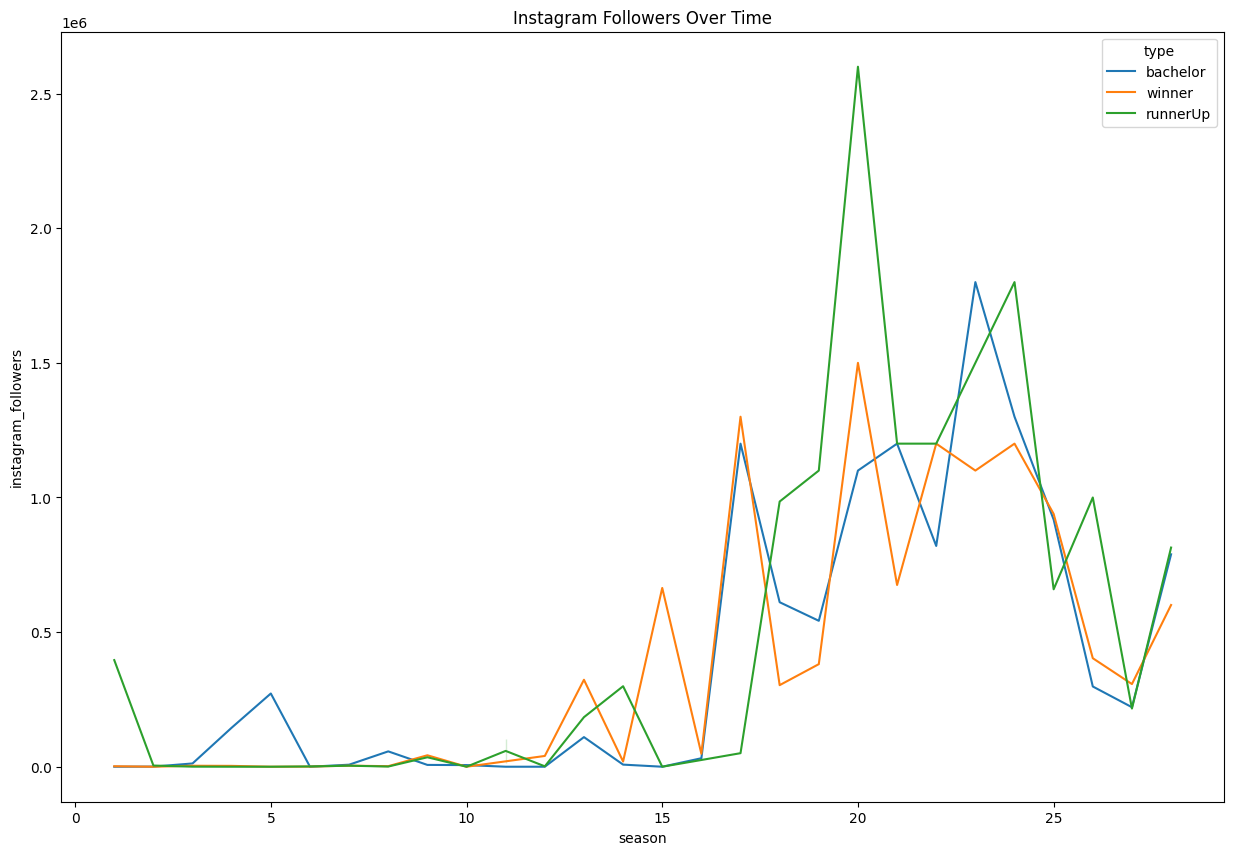

In [18]:
# Plot Bachelor and Contestant Instagram Followers Over Time
plt.figure(figsize=(15, 10))
sns.lineplot(data=combined_sm, x='season', y='instagram_followers', hue='type').set_title('Instagram Followers Over Time')
plt.show()

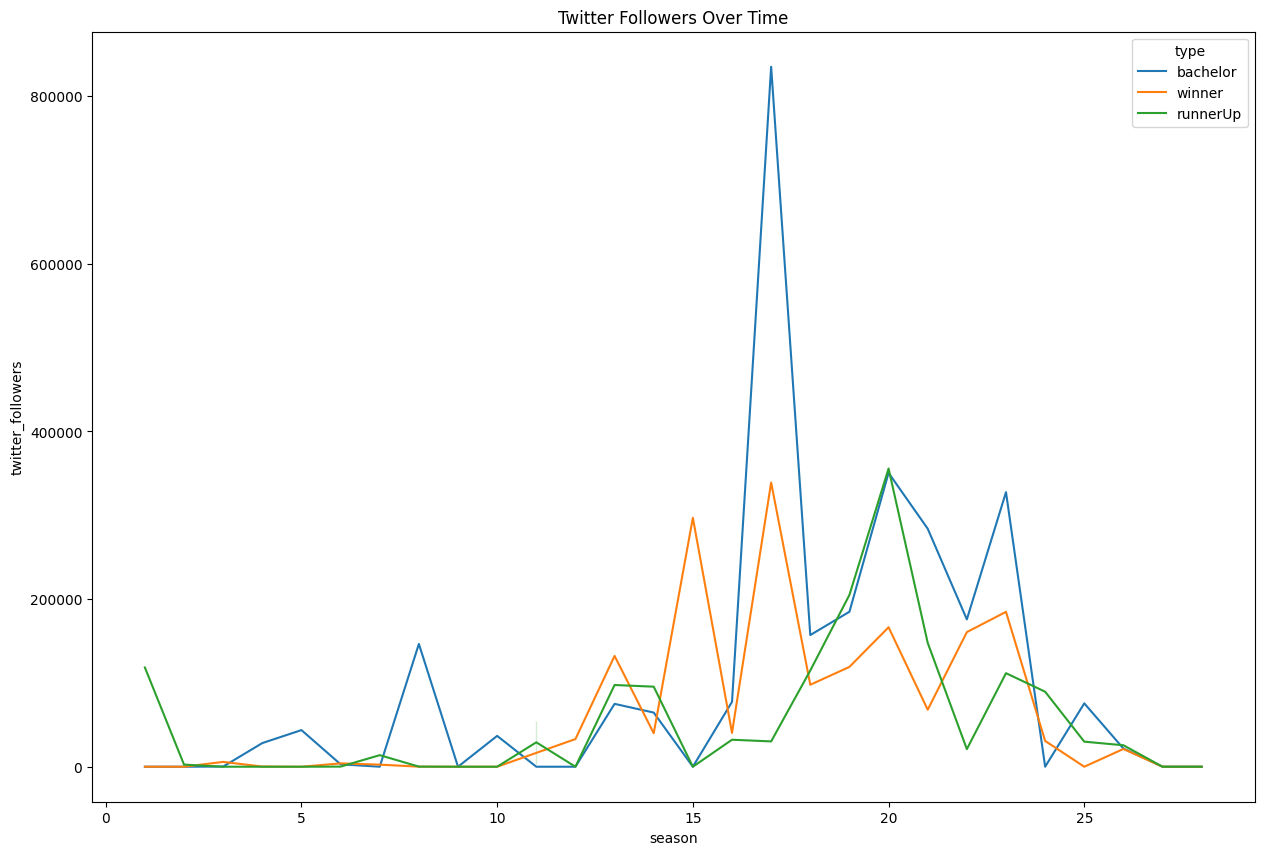

In [19]:
# Plot Bachelor and Contestant Twitter Followers Over Time
plt.figure(figsize=(15, 10))
sns.lineplot(data=combined_sm, x='season', y='twitter_followers', hue='type').set_title('Twitter Followers Over Time')
plt.show()

Instagram Followers and Winning Correlation & P-Value
PearsonRResult(statistic=-0.06816816752826266, pvalue=0.6176387270303769)


Text(0.5, 1.0, 'Instagram Followers vs Winning')

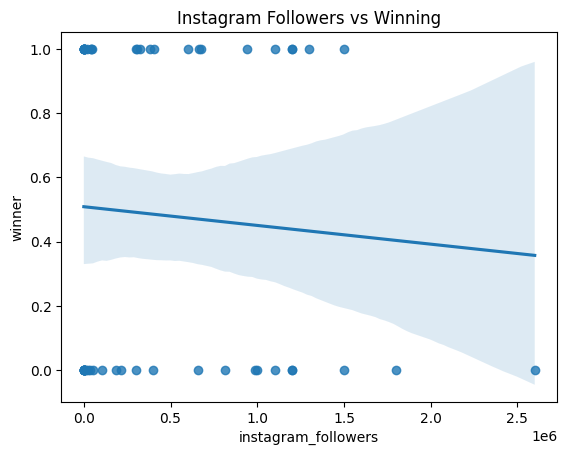

In [20]:
# Find Correlation Between Instagram Followers and Winning
winners_ext['winner'] = winners_ext['winner'].replace({'yes': 1, 'no': 0})

print('Instagram Followers and Winning Correlation & P-Value')
print(sp.stats.pearsonr(winners_ext['instagram_followers'], winners_ext['winner']))
sns.regplot(data=winners_ext, x='instagram_followers', y='winner').set_title('Instagram Followers vs Winning')

Twitter Followers and Winning Correlation & P-Value
PearsonRResult(statistic=0.06469371880637534, pvalue=0.6357130612266515)


Text(0.5, 1.0, 'Twitter Followers vs Winning')

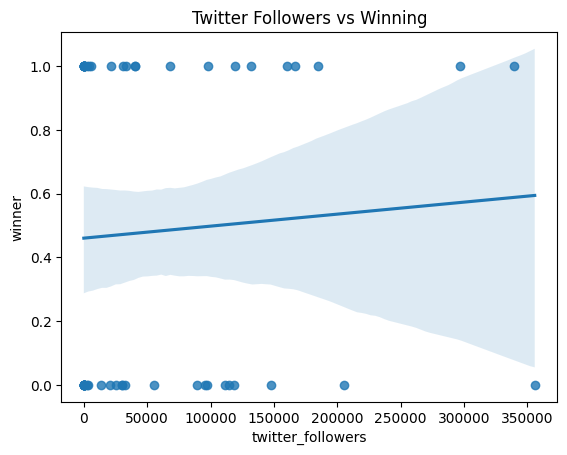

In [21]:
# Find Correlation Between Twitter Followers and Winning
winners_ext['winner'] = winners_ext['winner'].replace({'yes': 1, 'no': 0})

print('Twitter Followers and Winning Correlation & P-Value')
print(sp.stats.pearsonr(winners_ext['twitter_followers'], winners_ext['winner']))
sns.regplot(data=winners_ext, x='twitter_followers', y='winner').set_title('Twitter Followers vs Winning')

Instagram Followers (Omit People Without Followers) and Winning Correlation & P-Value
PearsonRResult(statistic=-0.08935213084974984, pvalue=0.5415031260520824)


Text(0.5, 1.0, 'Instagram Followers vs Winning (Omit People Without Followers)')

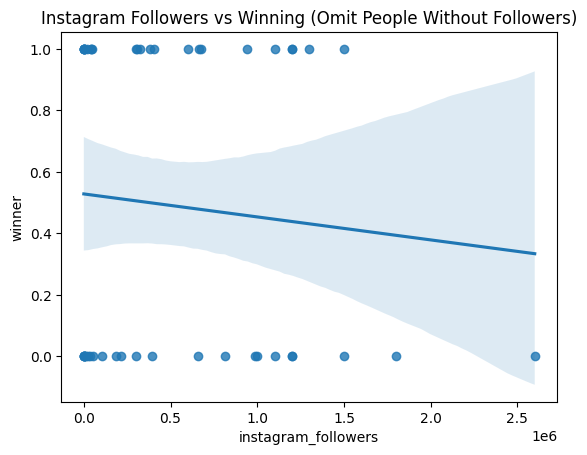

In [22]:
# Find Correlation Between Instagram Followers and Winning (Omit People Without Followers)
winners_ext['winner'] = winners_ext['winner'].replace({'yes': 1, 'no': 0})

mask = (winners_ext['instagram_followers'] == 0)
winners_ext_dropped = winners_ext[~mask]
print('Instagram Followers (Omit People Without Followers) and Winning Correlation & P-Value')
print(sp.stats.pearsonr(winners_ext_dropped['instagram_followers'], winners_ext_dropped['winner']))
sns.regplot(data=winners_ext_dropped, x='instagram_followers', y='winner').set_title('Instagram Followers vs Winning (Omit People Without Followers)')

Twitter Followers (Omit People Without Followers) and Winning Correlation & P-Value
PearsonRResult(statistic=0.07307986281981954, pvalue=0.6497739364787631)


Text(0.5, 1.0, 'Twitter Followers vs Winning (Omit People Without Followers)')

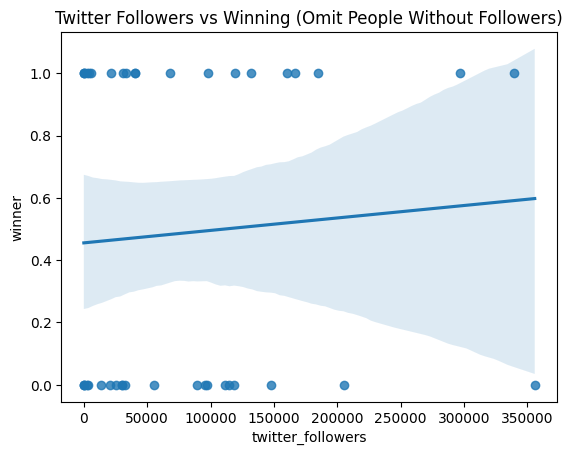

In [23]:
# Find Correlation Between Twitter Followers and Winning (Omit People Without Followers)
winners_ext['winner'] = winners_ext['winner'].replace({'yes': 1, 'no': 0})

mask = (winners_ext['twitter_followers'] == 0)
winners_ext_dropped = winners_ext[~mask]
print('Twitter Followers (Omit People Without Followers) and Winning Correlation & P-Value')
print(sp.stats.pearsonr(winners_ext_dropped['twitter_followers'], winners_ext_dropped['winner']))
sns.regplot(data=winners_ext_dropped, x='twitter_followers', y='winner').set_title('Twitter Followers vs Winning (Omit People Without Followers)')

Instagram Followers (Post Instagram Creation) and Winning Correlation & P-Value
PearsonRResult(statistic=-0.15154607118221744, pvalue=0.4414137817656922)


Text(0.5, 1.0, 'Instagram Followers vs Winning (Post Instagram Creation, Season 15)')

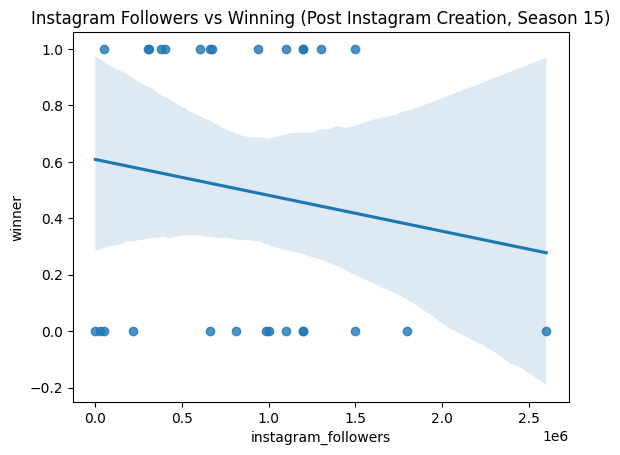

In [24]:
# Find Correlation Between Instagram Followers and Winning (Post Instagram Creation, Season 15)
winners_ext['winner'] = winners_ext['winner'].replace({'yes': 1, 'no': 0})

mask = (winners_ext['season'] < 15)
winners_ext_dropped = winners_ext[~mask]
print('Instagram Followers (Post Instagram Creation) and Winning Correlation & P-Value')
print(sp.stats.pearsonr(winners_ext_dropped['instagram_followers'], winners_ext_dropped['winner']))
sns.regplot(data=winners_ext_dropped, x='instagram_followers', y='winner').set_title('Instagram Followers vs Winning (Post Instagram Creation, Season 15)')

Instagram Followers (Post Season 15, Remove Outliers) and Winning Correlation & P-Value
PearsonRResult(statistic=0.03144690018677382, pvalue=0.8787929175238292)


Text(0.5, 1.0, 'Instagram Followers vs Winning (Post Season 15, Remove Outliers)')

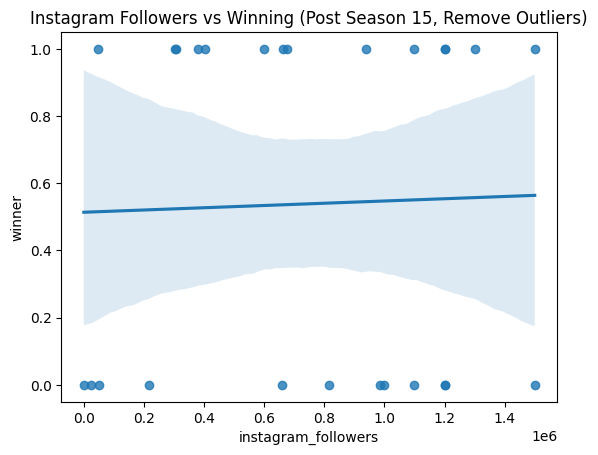

In [25]:
# Find Correlation Between Instagram Followers and Winning (Post Season 15, Remove Outliers)
winners_ext['winner'] = winners_ext['winner'].replace({'yes': 1, 'no': 0})

mask = (winners_ext['season'] < 15) | (winners_ext['instagram_followers'] > 1500000)
winners_ext_dropped = winners_ext[~mask]
print('Instagram Followers (Post Season 15, Remove Outliers) and Winning Correlation & P-Value')
print(sp.stats.pearsonr(winners_ext_dropped['instagram_followers'], winners_ext_dropped['winner']))
sns.regplot(data=winners_ext_dropped, x='instagram_followers', y='winner').set_title('Instagram Followers vs Winning (Post Season 15, Remove Outliers)')

In [26]:

bachelors['state'] = bachelors['hometown'].str.split(',').str[-1]
bachelors['state'] = bachelors['state'].str.strip()


conts['state'] = conts['hometown'].str.split(',').str[-1]
conts['state'] = conts['state'].str.strip()

bachelors_states = bachelors['state'].groupby(bachelors['state']).count().sort_values(ascending=False)
print('Most Popular State/Country of Bachelors')
display(bachelors_states.head(10))
conts_states = conts['state'].groupby(conts['state']).count().sort_values(ascending=False)
print('Most Popular State/Country of Contestants')
display(conts_states.head(10))

Most Popular State/Country of Bachelors


state
California      4
Georgia         2
Indiana         2
Virginia        2
Missouri        2
Texas           2
Pennsylvania    2
Colorado        1
Michigan        1
Italy           1
Name: state, dtype: int64

Most Popular State/Country of Contestants


state
California      89
Texas           47
Florida         46
Illinois        34
New York        29
Ohio            18
New Jersey      16
Georgia         15
Tennessee       14
Pennsylvania    14
Name: state, dtype: int64

In [27]:
print('Most Popular Job Title of All Contestants')
conts_jobs = conts['job'].groupby(conts['job']).count().sort_values(ascending=False)
display(conts_jobs.head(10))

Most Popular Job Title of All Contestants


job
Attorney             15
Realtor              13
Flight Attendant     10
Nanny                 9
Model                 9
Teacher               8
Account Executive     7
Graphic Designer      6
Marketing Manager     6
Student               6
Name: job, dtype: int64

In [28]:
print('Most Popular Job Title of Winning Contestants')
winners_jobs = winners['job'].groupby(winners['job']).count().sort_values(ascending=False)
display(winners_jobs.head(10))

Most Popular Job Title of Winning Contestants


job
Graphic Designer            2
Event Planner               1
Actress                     1
Fertility Nurse             1
Flight Attendant            1
Junior Project Manager      1
Marketing Representative    1
Model                       1
Pediatric Nurse             1
Publicist                   1
Name: job, dtype: int64